<a href="https://colab.research.google.com/github/cristovaor/bootcampigti/blob/master/DesafioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Final - Bootcamp Analista de Machine Learning ###



In [18]:
# Importandos Bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import pandas_profiling

In [1]:
# Importando Dataset
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [12]:
# Carregando Dataset
dados = pd.read_csv('cars.csv', sep=',')

In [5]:
#Visualizando dataset
dados.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


# Pergunta 1
Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:
1. Os valores nulos encontrados estão presentes apenas no variável “cubicinches”
2. Não foram encontrados valores nulos após a leitura dos dados.
3. Existem apenas duas características do tipo “string”.
4. Os valores nulos estão presentes apenas para a saída dos dados.

In [7]:
# Verificando Valores Nulos
dados.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [6]:
#Verificando informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [9]:
# Resposta 1
print("Resposta 1: Não foram encontrados valores nulos no Dataset")

Resposta 1: Não foram encontrados valores nulos no Dataset


# Pergunta 2
Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação é CORRETO afirmar:
1. Após a transformação não ocorre mudanças no tipo de variáveis.
2. Essa transformação deve ser realizada apenas para valores nulos.
3. Essa transformação adiciona valores nulos ao nosso dataset.
4. Após essa transformação não ocorreu a introdução de valores nulos.

In [13]:
# Transformando colunas para tipo numérico
dados[["cubicinches","weightlbs"]] = dados[["cubicinches","weightlbs"]].apply(pd.to_numeric, errors='coerce')

In [14]:
# Verificando dados após transformação
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


# Pergunta 3
Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [22]:
# Verificando os valores que forçaram a string da coluna cubicinches
dados_is_NA = dados[dados.cubicinches.isnull()]
dados_is_NA 

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


# Pergunta 4
Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [17]:
# Verificando dados nulos no Dataset após tranformação
dados.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

# Pergunta 5
Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [28]:
# Substitundo valores missing pela média
dados.fillna(dados.mean(), inplace=True)

In [30]:
# Visualizando se os dados foram substituidos
dados.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [29]:
# Visualizando novos dados
dados.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


# Pergunta 6
Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [31]:
# Visualizando Mediana
dados.median()

mpg              22.0
cylinders         6.0
cubicinches     156.0
hp               95.0
weightlbs      2904.0
time-to-60       16.0
year           1977.0
dtype: float64

# Pergunta 7
Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

1. 75% dos dados são maiores que o valor de 14,00.
2. Como esse valor representa a mediana para essa variável, é possível dizer que 50% dos valores são superiores a 14,00.
3. Apenas por esse valor é possível afirmar que existe uma menor dispersão entre valores inferiores a 14,00.
4. 25% dos valores de “time-to-60” são superiores ou iguais a 14,00.

In [300]:
# Visualizando Coluna "time-to-60"

maiorque14 = sum(map(lambda x : x>14, dados['time-to-60']))
maiorigualque14 = sum(map(lambda x : x>=14, dados['time-to-60']))
menorque14 = migualque14 = sum(map(lambda x : x<=14, dados['time-to-60']))
totaltime = dados['time-to-60'].count()
perc = maiorque14/totaltime
perc2 = maiorigualque14/totaltime
perc3 = menorque14/totaltime
print('Total de Valores maiores que 14: ', perc)


Total de Valores maiores que 14:  0.6590038314176245


In [199]:
dados['time-to-60'].median()

16.0

In [231]:
dados['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

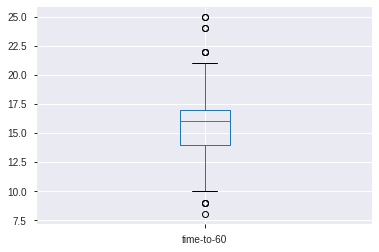

In [255]:
%matplotlib inline
dados.boxplot(column='time-to-60')

In [301]:
print('Apenas', perc, 'dos valores são acima de 14, a mediana é 16.00 e', perc2, 'é maior ou igual a 14')
print('Ou seja resposta correta é: Apenas por esse valor é possível afirmar que existe uma menor dispersão entre valores inferiores a 14,00. ')

Apenas 0.6590038314176245 dos valores são acima de 14, a mediana é 16.00 e 0.7624521072796935 é maior ou igual a 14
Ou seja resposta correta é: Apenas por esse valor é possível afirmar que existe uma menor dispersão entre valores inferiores a 14,00. 


# Pergunta 8
Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:
1. Caso fosse calculado o coeficiente de determinação entre essas duas variáveis, o valor seria, aproximadamente, 0,6.
2. Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” reduz em uma direção oposta.
3. Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” também aumenta em uma mesma direção.
4. Quando um coeficiente de correlação de Pearson é igual a 1, o coeficiente de determinação também será igual a 1.

In [40]:
# Analisando Coeficiênte de Pearson e R2
from scipy import stats

a = dados['cylinders']
b = dados['mpg']

stats.pearsonr(a, b)

-0.7767098829879999

In [41]:
# Correlação
print('O coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg” é {}'. format(dados['cylinders'].corr(dados['mpg'])))

O coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg” é -0.7767098829879999


In [222]:
# Coeficiente de Determinação
from sklearn.metrics import r2_score

def score_regression(y, y_hat, report=True):
    """
    Criar score
    :param y:
    :param y_hat:
    :return:
    """
    r2 = r2_score(y, y_hat)
    rmse = sqrt(mean_squared_error(y, y_hat))
    mae = mean_absolute_error(y, y_hat)

    report_string = "---Score--- \n"
    report_string += "R2 = " + str(r2) + "\n"
    report_string += "RMSE = " + str(rmse) + "\n"
    report_string += "MAE = " + str(mae) + "\n"

    if report:
        print(report_string)

    return mae, report_string 


In [223]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

score_regression(a, b, report=True)

---Score--- 
R2 = -130.3536562420295
RMSE = 19.827302280159355
MAE = 17.55478927203065



(17.55478927203065,
 '---Score--- \nR2 = -130.3536562420295\nRMSE = 19.827302280159355\nMAE = 17.55478927203065\n')

# Pergunta 9
Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

1. Através do boxplot é possível perceber que a mediana encontra-se entre os valores de 80 e 100.

2. Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.

3. Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”.

4. Não foi identificada a presença de possíveis outliers nos dados.

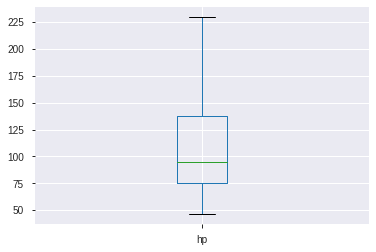

In [84]:
# Plotando Boxplot para Variavel "hp"
%matplotlib inline
dados.boxplot(column='hp')

In [261]:
# Analisando dados
dados['hp'].describe()

count    261.000000
mean     106.360153
std       40.499959
min       46.000000
25%       75.000000
50%       95.000000
75%      138.000000
max      230.000000
Name: hp, dtype: float64

In [286]:
# Contando número de observações por quartil
contando = pd.qcut(dados['hp'],4, labels=["Q1", "Q2", "Q3","Q4"])
contando.value_counts()


Q2    71
Q1    66
Q4    65
Q3    59
Name: hp, dtype: int64

# Pergunta 10
Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [202]:
# Normalizando dados HP
from sklearn.preprocessing import StandardScaler
#dados[['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60']].values
dataset_values = dados[['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year']].values
normaliza = StandardScaler() 
dataset = normaliza.fit(dataset_values)
dados_preprocessado = dataset.transform(dados[['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year']])
dados_normalizados = pd.DataFrame(dados_preprocessado)

In [203]:
# Criando Dataset com Valores Normalizados
dados_normalizados = pd.DataFrame(dados_preprocessado)
dados_normalizados.columns = ['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year']
dados_normalizados.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [204]:
# Visualizando valor máximo de HP
print('Valor máximo de hp após normalização:', dados_normalizados['hp'].max())

Valor máximo de hp após normalização: 3.05870398977614


# Pergunta 11
Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?
1. 92%.
2. 34%.
3. 13%.
4. 72%.

In [205]:
# Aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(dados_normalizados)

principalComponents = pca.fit_transform(dados_normalizados)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7'])
# PCA Variação Explicada
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

# Pergunta 12
Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:

1. Cada um dos clusters possui características próprias.
2. Existem 3 centroides após a aplicação da clusterização.
3. Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões.
4. Todos os clusters possuem a mesma quantidade de elementos.

In [151]:
# Criando K-means
from sklearn.cluster import KMeans
X = principalDf[['pc1','pc2','pc3']].values
kmeans = KMeans(n_clusters=3,random_state=42).fit(X)
kmeans.labels_

array([2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0],
      dtype=int32)

In [153]:
# Verificando Centroides
kmeans.cluster_centers_

array([[ 0.26412707,  0.51463305, -0.16818563, -0.19619678],
       [-1.89770575, -0.18998251, -0.00936051,  0.09819567],
       [ 3.08077916, -0.09951832,  0.1568234 , -0.0068883 ]])

In [155]:
# Contando numero de elementos em cada Cluster
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({1: 127, 2: 73, 0: 61})


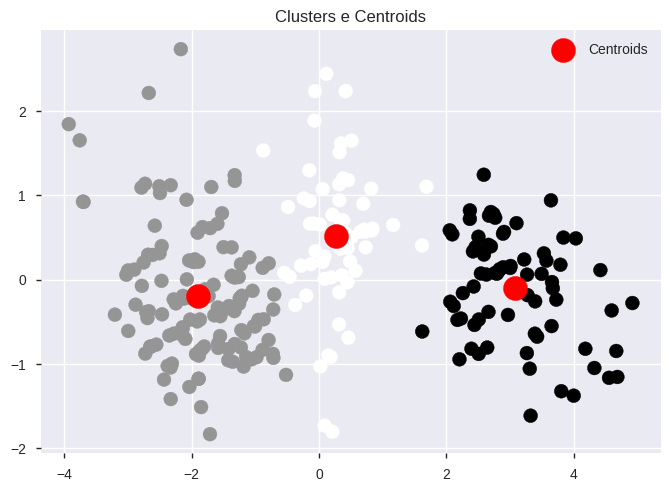

In [224]:
# Plotando Clusters e Centroides
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Clusters e Centroids')
plt.legend()

plt.show()


# Pergunta 13
Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas  ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?
1. Aproximadamente, 0,70.
2. Aproximadamente, 0,99.
3. Aproximadamente, 0,87.
4. Aproximadamente, 0,63.

In [187]:
# Crinado Colunas e definindo entradas
dados_normalizados['eficiencia'] =  np.where(dados['mpg'] > 25, 1,0)

entradas_arvore = dados_normalizados[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]
saidas_arvore = dados_normalizados['eficiencia']

In [170]:
dados_normalizados.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,eficiencia
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,0
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,1
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,0
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,0
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,1


In [188]:
# Parametros da Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.30,random_state=42)

clf_arvore = DecisionTreeClassifier()
# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)
#Realiza a previsão de classificaçao 
y_arvore = clf_arvore.predict(X_test)


In [260]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_arvore = accuracy_score(y_test, y_arvore)
print('A acurária para o algoritmo Árvore de Decisão é', acuracia_arvore)

A acurária para o algoritmo Árvore de Decisão é 0.8607594936708861


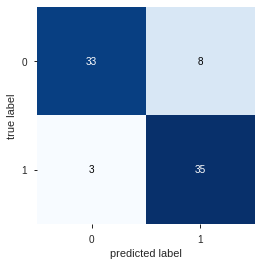

In [191]:
# Criando Matriz de Confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_arvore)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

# Pergunta 15
Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar:
1. A árvore de decisão e a regressão logística podem ser utilizadas para previsão em regressões.

2. Como os dois modelos obtiveram um resultado superior a 80% de acurácia, a escolha sobre qual utilizar deve e pode ser feita a partir de outros critérios, como a complexidade do modelo.

3. A acurácia de ambos os modelos foi superior a 80%.

4. A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.

In [230]:
# Regressão Logistica
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=42)
logisticRegr.fit(X_train, y_train)

# Acuracia do modelo
score = logisticRegr.score(X_test, y_test)
score

0.8607594936708861

In [259]:
# Avaliando as duas acuracias
print(f'A acurária para o algoritmo Árvore de Decisão é {acuracia_arvore} e a da Regressão Logistica foi {score}')

A acurária para o algoritmo Árvore de Decisão é 0.8607594936708861 e a da Regressão Logistica foi 0.8607594936708861


#**FIM!!!!**
